# Analysis of Bikes over the Fremont Bridge
1. Isolate the 2015 data, creating fields for date, hour, and count
2. use python matplotlib to plot the counts by hour
3. compute hourly average counts over the year
4. determine what is the busiest hour of the day

In [1]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandasql

In [2]:
#get the data
fremont_data = pd.read_csv("../data/4xy5-26gy.csv")

#need to format time column so that seconds are just integers and not decimals
fremont_data.date = [time.strptime(the_date[:-4], "%Y-%m-%dT%H:%M:%S") for the_date in fremont_data.date]
fremont_data["year"] = [the_date.tm_year for the_date in fremont_data.date]
fremont_data["hour"] = [the_date.tm_hour for the_date in fremont_data.date]

In [3]:
yr_2015 = fremont_data["year"] == 2015

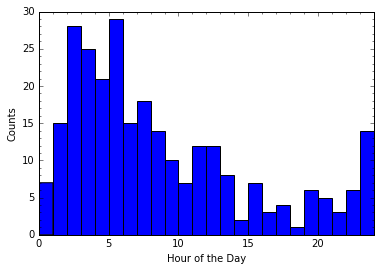

In [4]:
plt.hist(np.array(fremont_data[yr_2015]["fremont_bridge_nb"]), bins=np.linspace(0, 24, 25))
plt.xlim(0, 24)
plt.xlabel("Hour of the Day")
plt.ylabel("Counts")
plt.minorticks_on()
plt.show()

In [5]:
#Compute hourly averages over the year
# sql = "SELECT *"
# sql += " FROM fremont_data;"
# sql += " WHERE year = 2015"
# sql += " GROUP BY hour"
# pandasql.sqldf(sql, locals())
## These queries don't work after adding columns that are datetime objects

In [6]:
averages_dict = {"hour":[], "average_count":[]}
for hour in set(fremont_data.hour):
    selection = (yr_2015) & (fremont_data.hour == hour)
    averages_dict["hour"].append(hour)
    averages_dict["average_count"].append(sum(fremont_data[selection].fremont_bridge_nb) / float(sum(selection)))
    
mean_df = pd.DataFrame(averages_dict)

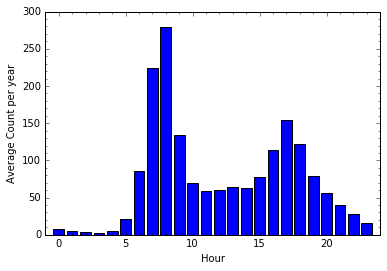

In [7]:
plt.bar(mean_df.hour, mean_df.average_count, align="center")
plt.minorticks_on()
plt.xlabel("Hour")
plt.ylabel("Average Count per year")
plt.xlim(-1, 24)
plt.show()

The peak hour appears to be 8am, followed by 7am, then 5pm